In [48]:
pip install pandas seaborn matplotlib


In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import requests
import os
from scipy.stats import linregress

In [5]:
# File to Load
suicides_data = Path("Resources/suicides_data.csv")

Suicides_data = pd.read_csv(suicides_data)
Suicides_data.head()
#http://localhost:8888/edit/Desktop/Project%203/Project-3/Resources/suicides_data.csv
# question 1

,data_id,country,year,sex,age,suicides_no,population,suicides/100k pop,generation
0,1,Albania,1987,male,15-24 years,21,312900,6.71,Generation X
1,2,Albania,1987,male,35-54 years,16,308000,5.19,Silent
2,3,Albania,1987,female,15-24 years,14,289700,4.83,Generation X
3,4,Albania,1987,male,75+ years,1,21800,4.59,G.I. Generation
4,5,Albania,1987,male,25-34 years,9,274300,3.28,Boomers


In [8]:
Suicides_data.dtypes

data_id                int64
country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
generation            object
dtype: object

In [18]:
Sorted_Df=Suicides_data[['country', 'year', 'age', 'sex','suicides/100k pop']]
Sorted_Df.head()

,country,year,age,sex,suicides/100k pop
0,Albania,1987,15-24 years,male,6.71
1,Albania,1987,35-54 years,male,5.19
2,Albania,1987,15-24 years,female,4.83
3,Albania,1987,75+ years,male,4.59
4,Albania,1987,25-34 years,male,3.28


In [19]:
# Create separate DataFrames for males and females
male_df = Sorted_Df[Sorted_Df['sex'] == 'male']


# Display the separate DataFrames
print("Male DataFrame:")
male_df.head()



Male DataFrame:


,country,year,age,sex,suicides/100k pop
0,Albania,1987,15-24 years,male,6.71
1,Albania,1987,35-54 years,male,5.19
3,Albania,1987,75+ years,male,4.59
4,Albania,1987,25-34 years,male,3.28
8,Albania,1987,55-74 years,male,0.73


In [20]:
female_df = Sorted_Df[Sorted_Df['sex'] == 'female']
print("\nFemale DataFrame:")
female_df.head()


Female DataFrame:


,country,year,age,sex,suicides/100k pop
2,Albania,1987,15-24 years,female,4.83
5,Albania,1987,75+ years,female,2.81
6,Albania,1987,35-54 years,female,2.15
7,Albania,1987,25-34 years,female,1.56
9,Albania,1987,5-14 years,female,0.00


In [50]:
combined_df = Sorted_Df.groupby(['country', 'year', 'age']).agg({'suicides/100k pop': 'sum'}).reset_index()

# Display the combined DataFrame
print("Combined DataFrame:")
combined_df.head()

Combined DataFrame:


,country,year,age,suicides/100k pop
0,Albania,1987,15-24 years,11.54
1,Albania,1987,25-34 years,4.84
2,Albania,1987,35-54 years,7.34
3,Albania,1987,5-14 years,0.00
4,Albania,1987,55-74 years,0.73


C:\Users\16474\AppData\Local\Temp\ipykernel_22264\1533772663.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='suicides/100k pop', hue='age', data=filtered_df, ci=None)


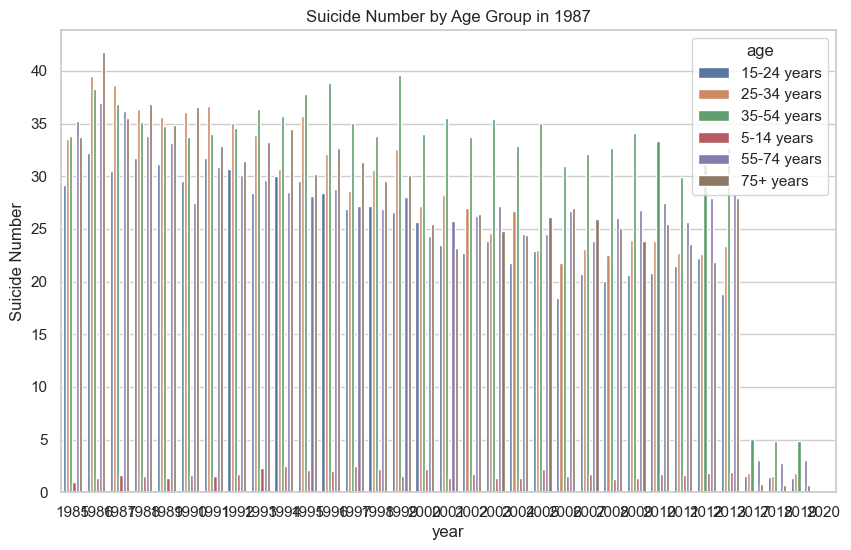

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = combined_df[combined_df['country'] == 'Canada']

# Create a stacked column chart using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x='year', y='suicides/100k pop', hue='age', data=filtered_df, ci=None)

plt.xlabel('year')
plt.ylabel('Suicide Number')
plt.title('Suicide Number by Age Group in 1987')

plt.show()

In [51]:
filtered_df.to_csv('Graph_1.csv', index=False)
Sorted_Df.to_csv('Piechart.csv', index=False)

In [ ]:
#1 Df country,year,age,suicide_no - Stacked coloumn chart filtered by year 
#2 Df country,year,sex,Suicide_no -Pie chart Comparison of two chart main filter country and year filter per pie chart 


In [ ]:
# plot a chart where Country data is a filter with Year on the X axis and Suicide_no being on the y axis with the age breakdown in a stacked Barchart


In [4]:
# File to Load
gdp_data = Path("Resources/gdp_data.csv")

GDP_DATA = pd.read_csv(gdp_data)
GDP_DATA.head()
#http://localhost:8888/edit/Desktop/Project%203/Project-3/Resources/gdp_data.csv
#Join gdp data with country_latitude_and_longitude


,data_id,country,gdp_for_year,gdp_per_capita
0,1,Albania,"2,15,66,24,900",796.0
1,2,Albania,"2,15,66,24,900",796.0
2,3,Albania,"2,15,66,24,900",796.0
3,4,Albania,"2,15,66,24,900",796.0
4,5,Albania,"2,15,66,24,900",796.0


In [6]:
# File to Load
country_latitude_and_longitude = Path("Resources/world_country_latitude_and_longitude.csv")

Country_latitude_and_longitude = pd.read_csv(country_latitude_and_longitude)
Country_latitude_and_longitude.head()
#http://localhost:8888/edit/Desktop/Project%203/Project-3/Resources/world_country_latitude_and_longitude.csv

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
